In [1]:
!pip install scikit-learn==1.2.2 pandas joblib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
df=pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
df.shape

(2290, 6)

In [10]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
df. describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
correlation = df.corr(numeric_only=True)

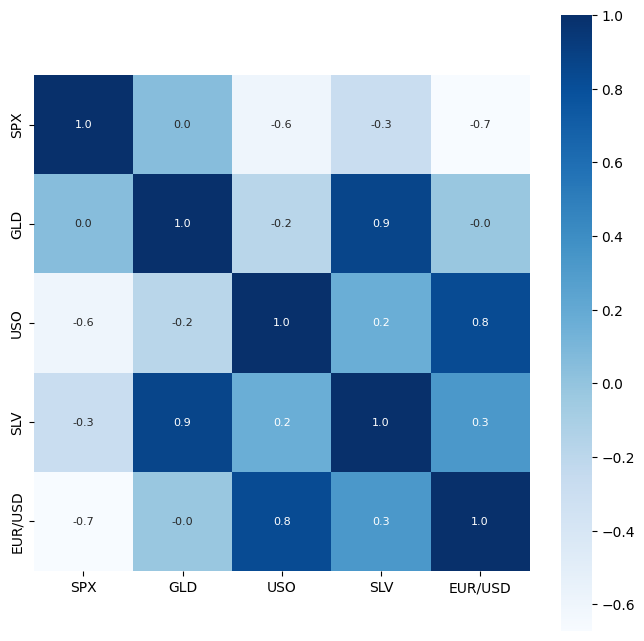

In [14]:
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',
            annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipykernel_92/3736964373.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

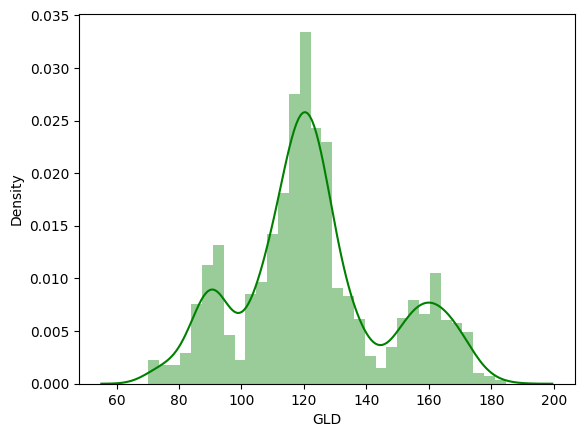

In [16]:
sns.distplot(df['GLD'],color='green')

In [17]:
X=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

In [18]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:

from sklearn import __version__ as sklearn_version


In [22]:
print(f"scikit-learn version: {sklearn_version}")

scikit-learn version: 1.2.2


In [23]:
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    min_samples_split=2
)

In [24]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [26]:
pred=model.predict(X_test)

In [27]:
print(pred)

[122.46679941 130.28880316 127.70419932  96.69889736 118.97240056
 114.50079901 124.67450149 117.84389959 108.10790103  98.21069968
  95.61129937 167.99879857 149.34040124 116.13570008 170.55530159
  84.96309989 123.23299888 109.29119695 113.14450051 131.563303
 124.27449887 113.57320034 115.97140016 108.77999947 108.75810135
 125.68899929 120.15309974 112.16129943 113.37350151 125.49139916
 146.0725016   89.49199989 167.60339936 113.6085993  108.53440132
 120.03740137 141.96739869 161.38440156 173.95969773 152.9370014
 119.38640093 113.20980076 121.44059937 113.70969947 121.9691377
 108.14450089  89.00129887 114.45169953 129.91440194 118.05950108
 104.45459997 129.91970221 107.13079886 160.90640329 131.64309968
 118.5029995  146.78180036 135.33990244  95.55730104 124.40920156
 114.86129883  86.201401   104.31749892 113.93220076  84.17659911
 122.26760039 116.71309919 113.68990203 165.20290268  92.47060002
  80.27200113 161.06700091 159.14610271 106.78669997 149.17440077
 109.83499725 

In [28]:
r2_square=metrics.r2_score(y_test,pred)
print("Error Score: ",r2_square)

Error Score:  0.9900245384549384


In [29]:
y_test=list(y_test)

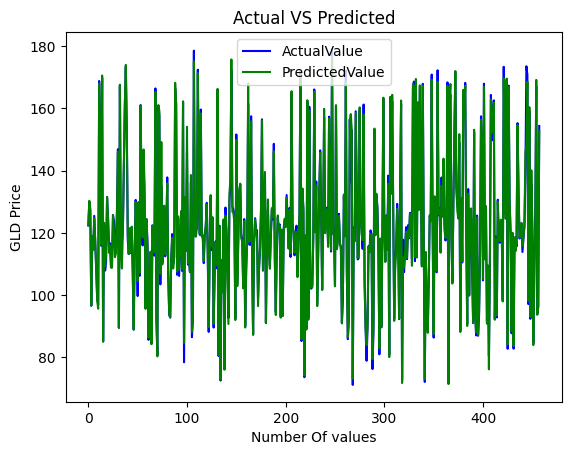

In [30]:
plt.plot(y_test,color='blue',label='ActualValue')
plt.plot(pred,color='green',label="PredictedValue")
plt.title("Actual VS Predicted")
plt.xlabel('Number Of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [31]:
import joblib
import json

In [36]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
import sklearn
# import joblib
# import json

In [37]:
joblib.dump(model, 'gold_model_compatible.joblib')

# Save complete metadata
metadata = {
    'features': list(X.columns),
    'sklearn_version': sklearn.__version__,
    'python_version': '.'.join(map(str, sys.version_info[:3])),
    'training_date': pd.Timestamp.now().isoformat(),
    'model_params': model.get_params()
}

with open('model_metadata_compatible.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print("Model saved successfully with all metadata!")

NameError: name 'sys' is not defined

In [ ]:
# Save with multiple methods for maximum compatibility
joblib.dump(rf, 'gold_model_v1.joblib')  # Primary save method

# Save metadata including feature names and versions
model_metadata = {
    'features': list(X.columns),
    'sklearn_version': sklearn_version,
    'model_type': 'RandomForestRegressor',
    'model_params': rf.get_params()
}

with open('model_metadata_v1.json', 'w') as f:
    json.dump(model_metadata, f)

print("Model saved successfully!")
print(f"Features used: {model_metadata['features']}")

In [ ]:
# Save using joblib with explicit protocol
joblib.dump(rf, 'gold_price_model1.joblib', compress=3, protocol=4)

# Also save the column names for validation
import json
with open('model_columns.json', 'w') as f:
    json.dump(list(X.columns), f)

In [ ]:
import joblib

# Save the trained model
joblib.dump(rf, 'gold_price_model.pkl')
print("Model saved as gold_price_model.pkl")


In [ ]:
import pickle
with open('gold_price_Model.pkl', 'wb') as file:
    pickle.dump(rf, file)
